In [5]:
%load_ext autoreload
%autoreload

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

sys.path.append('../../utils/')
from utils import feature_selection, fs_driver, feature_snapshot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Features relevance

In [2]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = DecisionTreeClassifier(max_depth=7,min_samples_split=10,min_samples_leaf=7,random_state=0)
tree.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The following commands allow us to see how important each feature is in the decision process.

In [3]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.37844302e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.74288096e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.50946213e-03 2.22701120e-04 0.00000000e+00
 0.00000000e+00 1.50929812e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.62949949e-01
 0.00000000e+00 0.00000000e+00 1.72281683e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.21814594e-04 4.21874895e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.26215450e-04 6.41100850e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.19033571e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

Text(0, 0.5, 'Feature')

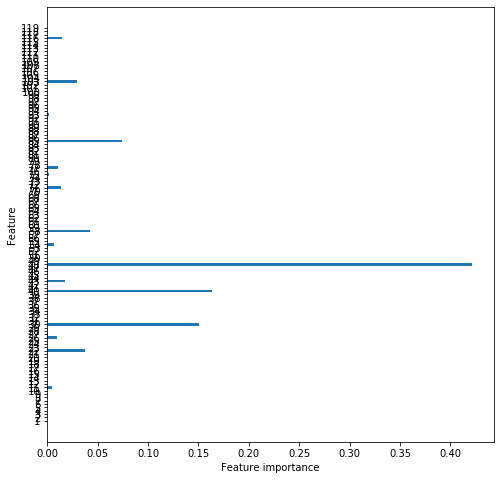

In [4]:
n_features = data.shape[1]
plt.rcParams["figure.figsize"] = (8,8)
plt.barh(range(n_features), tree.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), np.arange(1,120)) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

As we can see, out of 119 features only a very few are actually used by the learning algorithm. Let's apply some pruning on the features to see if it improves the accuracies (or even the speed of the process).

In [21]:
feature_selection('../../../dumps/various_sizes/8K.csv','tree')

Execution            # features  Features selected      Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  -------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']              0.994171    0.996849    0.275114          0
K best features              13  ['f22','f26','f30',            0.992124    0.994959    0.128377          0.25784
                                 'f40','f43','f48',
                                 'f54','f58','f71',
                                 'f77','f85','f103',
                                 'f116']
Iterative process             2  ['f40','f48']                  0.983302    0.981727    0.117733          0.578491


Let's see if the performance can be improved when using a larger dataset which is around twice the size of the previous one (16000 entries).

In [22]:
feature_selection('../../../dumps/various_sizes/16K.csv','tree')

Execution            # features  Features selected      Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  -------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']              0.992049    0.988155    0.506215          0
K best features              17  ['f11','f22','f27',            0.991737    0.986596    0.251494          0.457815
                                 'f29','f40','f43',
                                 'f48','f58','f68',
                                 'f75','f76','f83',
                                 'f84','f85','f96',
                                 'f97','f116']
Iterative process             5  ['f40','f43','f48',            0.98667     0.98005     0.253218          1.16491
                                 'f58','f76']


We can notice that the results we get with the first feature extraction are really close to the classical ones but faster, which means that the model could definitely be simplified to a few features without loosing to much accuracy. The performances we get when applying our iterative process are also quite close, just slighly worse but we suffer from time explosion while the K best features extraction decreases the overall time.

Let's see how it goes when modifying the threshold for feature importance (default value is 0.5%) :

In [4]:
fs_driver('../../../dumps/various_sizes/16K.csv','tree',[0.005,0.05,0.10,0.20])

Threshold : 0.005000
Execution            # features  Features selected      Training set acc    Test acc    Time (s)    Fixed cost (s)
-----------------  ------------  -------------------  ------------------  ----------  ----------  ----------------
Classic                     119  ['f1',...,'f119']              0.992049    0.988155    0.552627           0
K best features              17  ['f11','f22','f27',            0.991737    0.986596    0.266732           0.47375
                                 'f29','f40','f43',
                                 'f48','f58','f68',
                                 'f75','f76','f83',
                                 'f84','f85','f96',
                                 'f97','f116']
Iterative process             5  ['f40','f43','f48',            0.98667     0.98005     0.232213           1.12313
                                 'f58','f76']


Threshold : 0.050000
Execution            # features  Features selected      Training set acc    Test acc  

We could reduce our model to only feature 48 in order to save twice the amount of time while accepting a degradation of 4-5% in terms of accuracy.

In [6]:
feature_snapshot('../../../dumps/time_analysis/threshold_3/3_20190615_31000.csv','tree')

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
/usr/local/lib/pytho

K best features : 

Accuracy on training set: 0.984
Accuracy on test set: 0.985
------------------------------ 

Iterative process : 

Accuracy on training set: 0.970
Accuracy on test set: 0.970
